## EXPERIMENT-4

#### Initial Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r'profits.csv', names=['population', 'profit'])

df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


#### Data Visualization

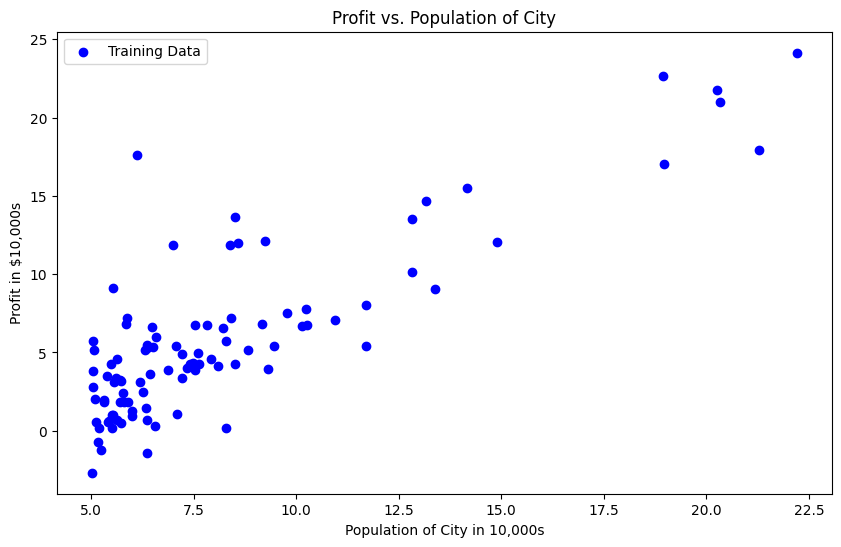

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['population'], df['profit'], c='blue', marker='o', label='Training Data')
plt.title('Profit vs. Population of City')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend()
plt.show()

#### Data Preprocessing

In [4]:
X = df['population'].values.reshape(-1, 1)  # Features
y = df['profit'].values.reshape(-1, 1)      # Target variable
m = len(y)  # Number of training examples

# Add a bias term (intercept) to X
X_b = np.c_[np.ones((m, 1)), X]

#### Gradient Descent

In [5]:
# Initialize parameters and hyperparameters
theta = np.zeros((2, 1))  # Initialize theta to [0, 0]
learning_rate = 0.01  # A common choice; can be tuned
n_iterations = 1500  # Number of iterations to run
cost_history = []

# Gradient Descent loop
for iteration in range(n_iterations):
    # Calculate predictions
    y_pred = X_b.dot(theta)

    # Calculate the error
    error = y_pred - y

    # Calculate gradients
    gradients = (2 / m) * X_b.T.dot(error)

    # Update theta
    theta = theta - learning_rate * gradients

    # Calculate and store the cost (Mean Squared Error) for monitoring
    cost = (1 / m) * np.sum(np.square(error))
    cost_history.append(cost)

print("\nTheta found by Gradient Descent:")
print(theta)


Theta found by Gradient Descent:
[[-3.87813769]
 [ 1.19126119]]


#### Model Evaluation and Visualization

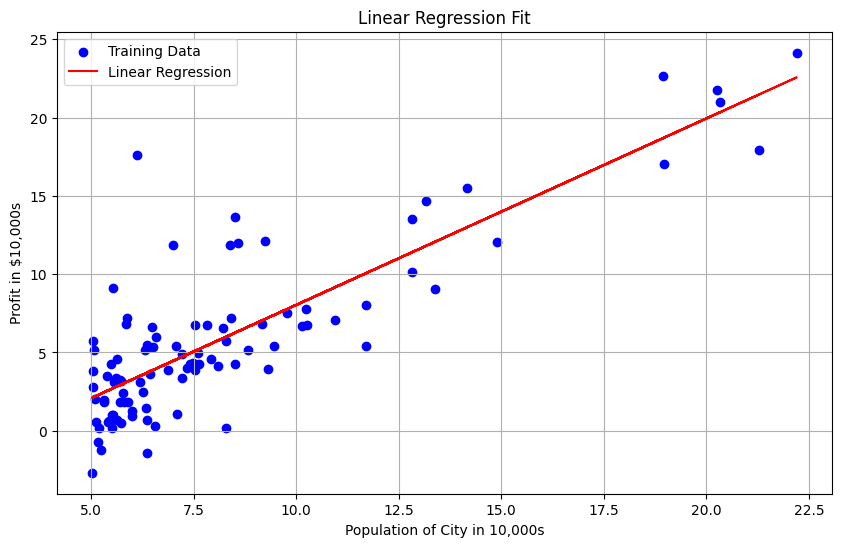

In [6]:
# Plot the best-fit line
plt.figure(figsize=(10, 6))
plt.scatter(df['population'], df['profit'], c='blue', marker='o', label='Training Data')
plt.plot(X, X_b.dot(theta), c='red', label='Linear Regression')
plt.title('Linear Regression Fit')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.grid(True)
plt.legend()
plt.show()

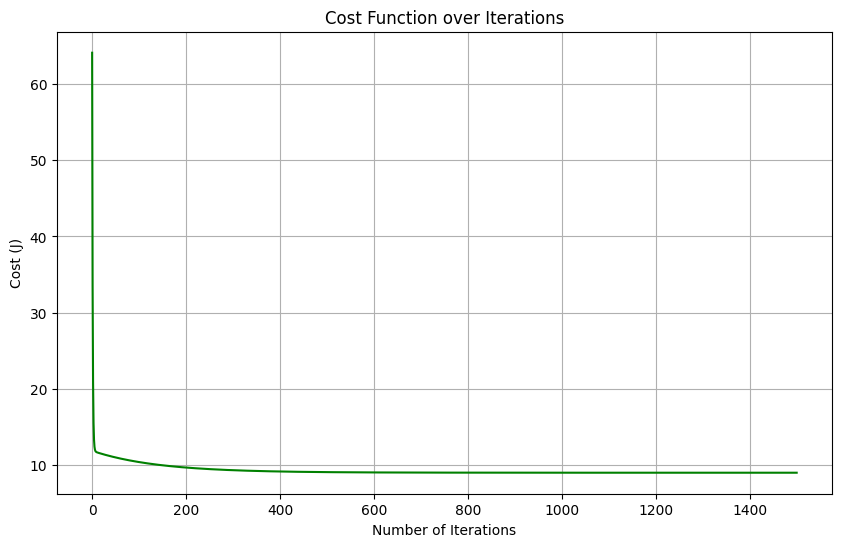

In [7]:
# Plot the cost history
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), cost_history, c='green')
plt.title('Cost Function over Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.grid(True)
plt.show()

In [8]:
rmse = root_mean_squared_error(y,X_b.dot(theta))
r2 = r2_score(y,X_b.dot(theta))
print('Root mean squared error:', rmse)
print('R2 score:',r2)

Root mean squared error: 2.9923234166487482
R2 score: 0.7020296676632941
